# Image Classification using CNN (Convolutional Neural Networks)

In [1]:
from keras.datasets import mnist
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [3]:
xtrain[0:2]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [4]:
xtrain.shape

(60000, 28, 28)

In [5]:
xtest.shape

(10000, 28, 28)

In [6]:
ytrain[0:2]

array([5, 0], dtype=uint8)

### Visualize the training data

In [7]:
list(range(9))

[0, 1, 2, 3, 4, 5, 6, 7, 8]

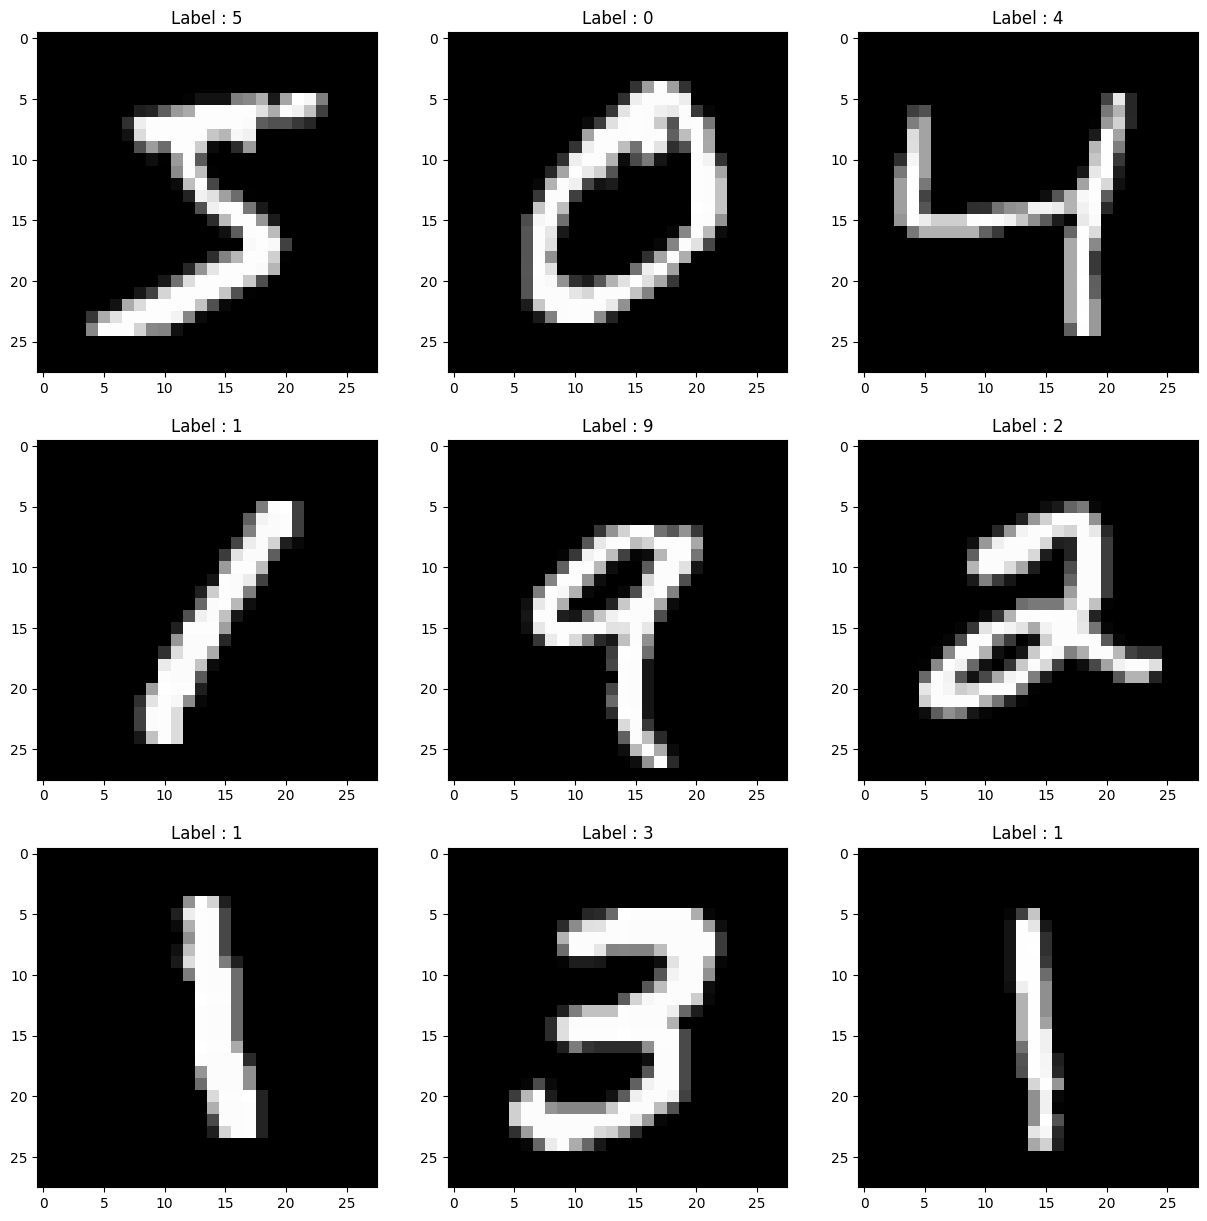

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(xtrain[i],cmap='gray')
    plt.title(f'Label : {ytrain[i]}')
plt.show()

<Axes: >

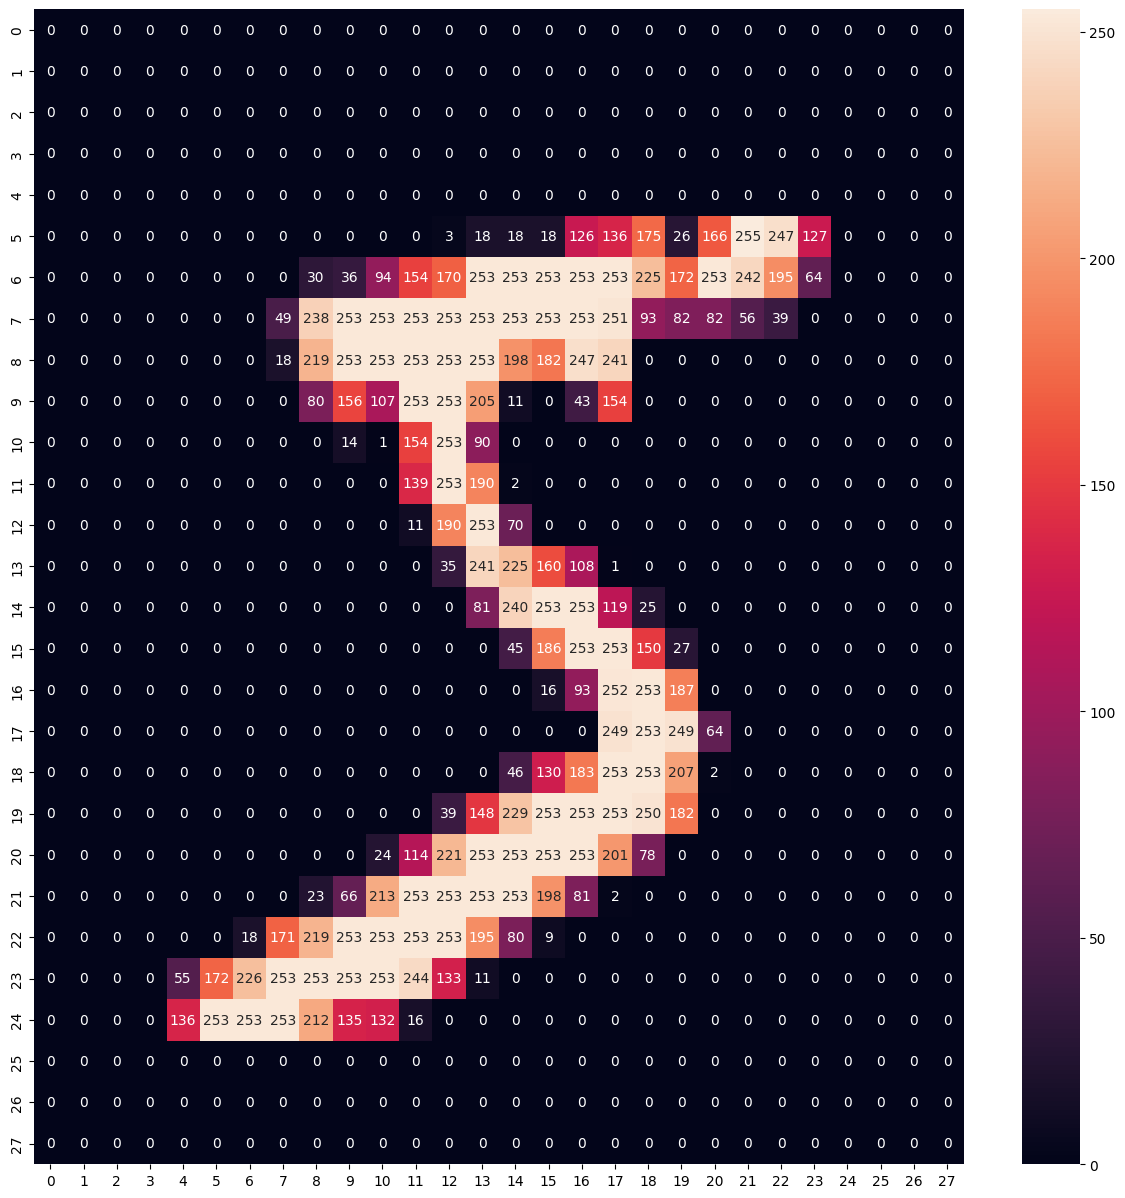

In [11]:
# Seaborn for visualizing digits
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(xtrain[0],annot=True,fmt='d')

## Image Preprocessing

In [9]:
# Scaling
xtrain_scl = xtrain/255
xtest_scl = xtest/255

### One Hot Encode ytrain, ytest as classification is multiclass

In [12]:
from keras.utils import to_categorical
ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)

In [14]:
ytrain_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [16]:
ytest_cat[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

### Building the CNN Neural Network

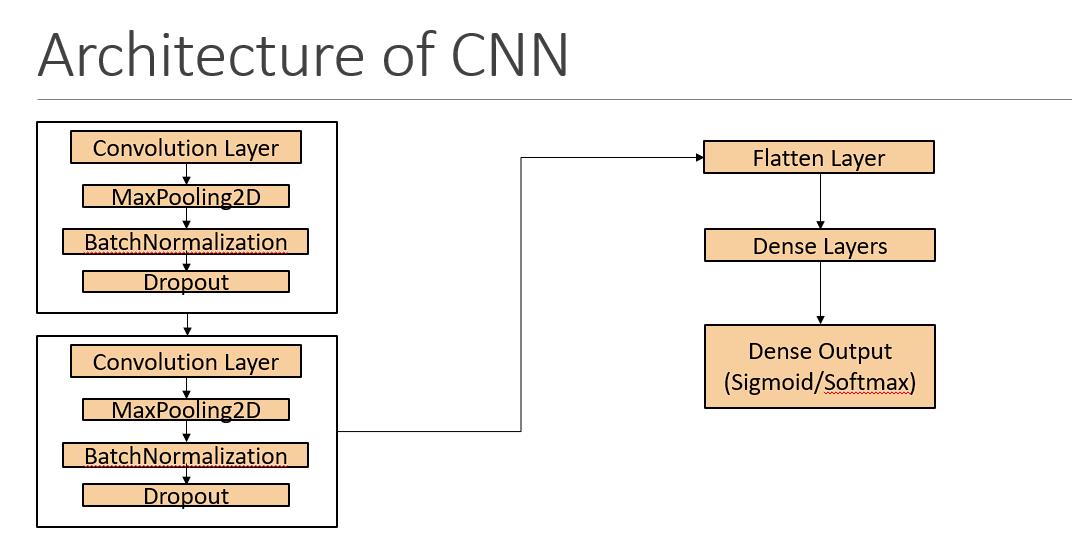

In [17]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense

In [19]:
ytrain_cat.shape[1]

10

In [20]:
# Initialize model
model = Sequential()

# Convolutional Layer 1
model.add(Convolution2D(filters=16, kernel_size=(3,3), input_shape = (28,28,1)))
# Max Pooling Layer 1
model.add(MaxPooling2D(pool_size=(2,2)))
# Batch Normalization Layer 1
model.add(BatchNormalization())
# Dropout Layer 1
model.add(Dropout(0.1))

# Convolution Layer 2
model.add(Convolution2D(filters=16, kernel_size=(3,3)))
# Max Pooling layer 2
model.add(MaxPooling2D(pool_size=(2,2)))
# Batch Normalization Layer 2
model.add(BatchNormalization())
# Dropou Layer 
model.add(Dropout(0.1))

# Flatten Layer
model.add(Flatten())

# Dense Layers
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))

# Output Layer
model.add(Dense(ytrain_cat.shape[1], activation='softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 13, 13, 16)        64        
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 13, 13, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0

In [22]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
# Fit the model and store the history
hist = model.fit(xtrain_scl, ytrain_cat, validation_split=0.2, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 15s 9ms/step - loss: 0.1815 - accuracy: 0.9437 - val_loss: 0.1127 - val_accuracy: 0.9652
Epoch 2/5
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0711 - accuracy: 0.9778 - val_loss: 0.0707 - val_accuracy: 0.9774
Epoch 3/5
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0530 - accuracy: 0.9837 - val_loss: 0.0549 - val_accuracy: 0.9831
Epoch 4/5
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0423 - accuracy: 0.9866 - val_loss: 0.0610 - val_accuracy: 0.9828
Epoch 5/5
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0359 - accuracy: 0.9882 - val_loss: 0.0525 - val_accuracy: 0.9855


## Plot the learning curve

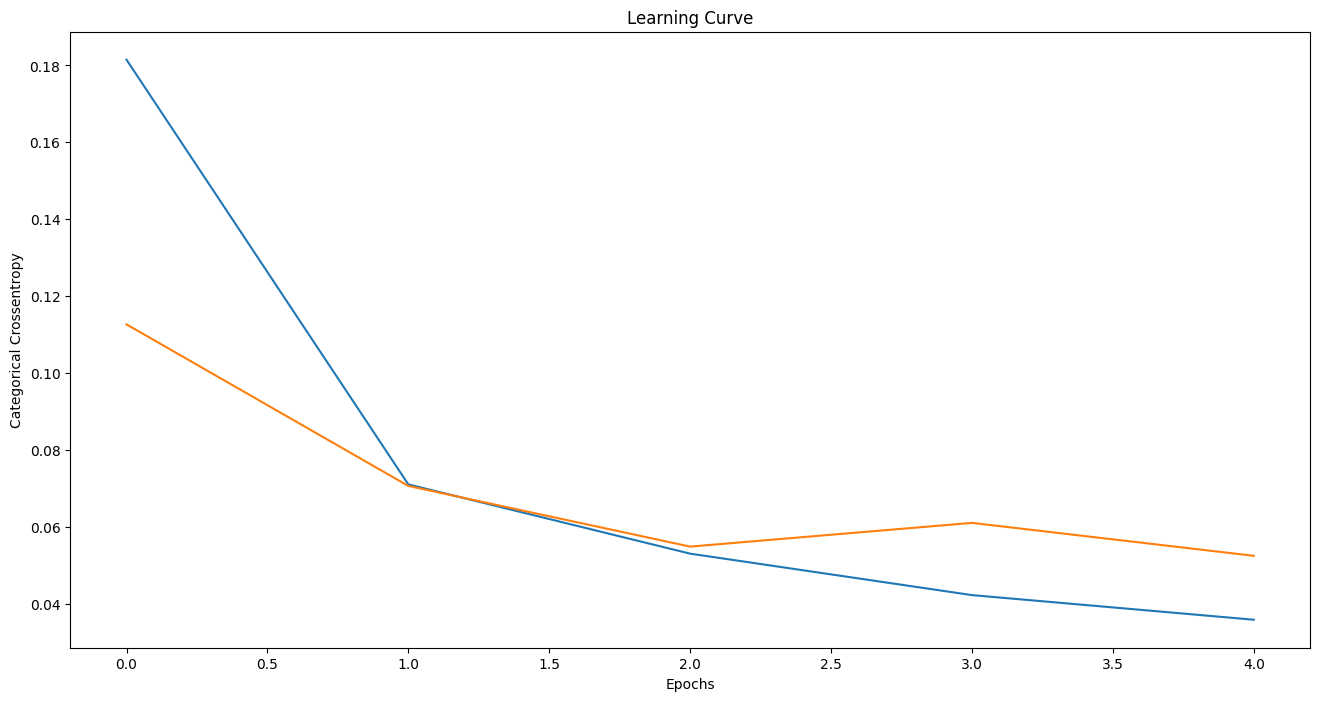

In [24]:
plt.figure(figsize=(16,8))
plt.plot(hist.history['loss'],label='Training Loss')
plt.plot(hist.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Categorical Crossentropy')
plt.title('Learning Curve')
plt.show()

### Evaluate model on training and testing

In [25]:
# Training
model.evaluate(xtrain_scl, ytrain_cat)

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0239 - accuracy: 0.9924


[0.023886235430836678, 0.9924166798591614]

In [26]:
# Testing 
model.evaluate(xtest_scl, ytest_cat)

313/313 [==============================] - 1s 4ms/step - loss: 0.0462 - accuracy: 0.9863


[0.0461641363799572, 0.986299991607666]

## Predictions

In [27]:
yprob_tr = model.predict(xtrain_scl)
yprob_ts = model.predict(xtest_scl)

313/313 [==============================] - 1s 3ms/step


In [28]:
yprob_tr[0:5]

array([[8.5764479e-11, 8.3002618e-09, 2.1618169e-11, 1.2414067e-02,
        1.2827240e-11, 9.8758507e-01, 5.9079910e-09, 4.5102442e-09,
        6.7243474e-07, 1.1102322e-07],
       [1.0000000e+00, 9.3181546e-14, 9.5122221e-10, 7.2077530e-14,
        2.4240690e-13, 5.8248960e-17, 1.7642341e-11, 5.9812181e-14,
        8.9391941e-14, 1.2917973e-12],
       [1.6879581e-10, 3.9830155e-08, 4.5959423e-09, 2.9837560e-11,
        9.9999750e-01, 4.1326849e-08, 2.4599028e-10, 1.2871477e-07,
        1.0049572e-08, 2.3072096e-06],
       [2.4666994e-08, 9.9999964e-01, 6.2432197e-09, 2.1109796e-11,
        2.0990754e-07, 3.6431297e-10, 2.1213269e-09, 1.2398560e-09,
        1.3849427e-07, 1.3592599e-10],
       [2.5945412e-09, 1.2980304e-08, 1.2941838e-08, 1.0764228e-05,
        7.1934296e-04, 3.1922948e-06, 4.5191078e-09, 5.9450590e-06,
        4.9500218e-06, 9.9925572e-01]], dtype=float32)

In [29]:
import numpy as np
ypred_tr = np.argmax(yprob_tr,axis=-1)
ypred_ts = np.argmax(yprob_ts,axis=-1)

In [30]:
ypred_tr[0:5]

array([5, 0, 4, 1, 9], dtype=int64)

In [32]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [33]:
ypred_ts[0:5]

array([7, 2, 1, 0, 4], dtype=int64)

In [34]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

## Plot Confusion Matrix

In [35]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

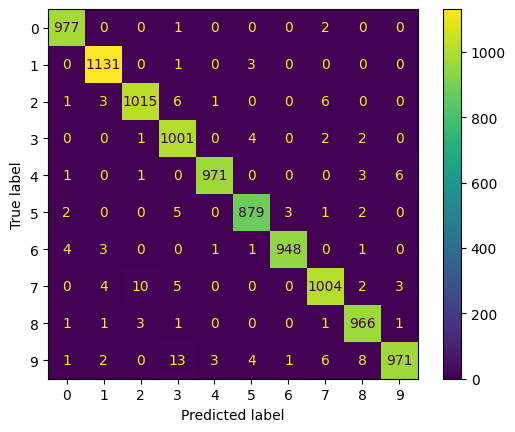

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=list(range(10)))
cfd.plot()

### Classification Report

In [37]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### Save the model for future use

In [38]:
model.save('Handwritten_model.h5')

e:\Deep Learning\repository\venv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
